In [1]:
import pandas as pd

In [4]:
# Import the file with labels
labels = pd.read_csv("data\FTD-labels.txt", sep="\t")

labels

,ID,labels,Multiple labels
0,__id__1-syndicate,A1 (argumentative),NaN
1,__id__2-syndicate,A1 (argumentative),NaN
2,__id__3-syndicate,A1 (argumentative),NaN
3,__id__4-syndicate,A1 (argumentative),NaN
4,__id__5-syndicate,A1 (argumentative),NaN
...,...,...,...
1681,__id__1682-britannica,A1 (argumentative),NaN
1682,__id__1683-britannica,A16 (information),NaN
1683,__id__1684-britannica,A1 (argumentative),NaN
1684,__id__1685-britannica,A12 (promotion),NaN


In [6]:
labels.describe()

,ID,labels,Multiple labels
count,1686,1686,139
unique,1686,44,1
top,__id__1-syndicate,A1 (argumentative),y
freq,1,297,139


In [9]:
# Import the file with texts
texts = pd.read_csv("data\FTD-texts.txt", sep="\t")
texts

,texts
0,BMW's and Chinese Justice * * * * * In most pl...
1,China and a New Balance of Power SHANGHAI – Th...
2,China and Russia in the New World Disorder Can...
3,The Roots of Chinese / Japanese Rivalry BOSTON...
4,China's Cyber-Warriors NEW DELHI – The world n...
...,...
1681,"In Eichmann in Jerusalem , Hannah Arendt descr..."
1682,The vast expanse of the African continent span...
1683,"Lance Corporal Samantha L. Jones , USMC Politi..."
1684,"Courtesy of the Victoria and Albert Museum , L..."


In [12]:
# Merge the two documents
df = pd.concat([labels,texts], axis=1)

df

,ID,labels,Multiple labels,texts
0,__id__1-syndicate,A1 (argumentative),NaN,BMW's and Chinese Justice * * * * * In most pl...
1,__id__2-syndicate,A1 (argumentative),NaN,China and a New Balance of Power SHANGHAI – Th...
2,__id__3-syndicate,A1 (argumentative),NaN,China and Russia in the New World Disorder Can...
3,__id__4-syndicate,A1 (argumentative),NaN,The Roots of Chinese / Japanese Rivalry BOSTON...
4,__id__5-syndicate,A1 (argumentative),NaN,China's Cyber-Warriors NEW DELHI – The world n...
...,...,...,...,...
1681,__id__1682-britannica,A1 (argumentative),NaN,"In Eichmann in Jerusalem , Hannah Arendt descr..."
1682,__id__1683-britannica,A16 (information),NaN,The vast expanse of the African continent span...
1683,__id__1684-britannica,A1 (argumentative),NaN,"Lance Corporal Samantha L. Jones , USMC Politi..."
1684,__id__1685-britannica,A12 (promotion),NaN,"Courtesy of the Victoria and Albert Museum , L..."


In [18]:
# Remove  </doc>  at the end of texts
df["texts"] = df["texts"].str.strip(" </doc>")

df.texts[1]

'China and a New Balance of Power SHANGHAI – The last rival superpower to the United States , the Soviet Union , collapsed in 1991 . But , apart from its military strength , the USSR was never really powerful enough to counterbalance US influence . In the late 1980\'s , Japan seemed capable of challenging America\'s industrial leadership , but by the 1990\'s it lost its competitive edge . China might itself wish to be a major force in a multi-polar world , but has been plagued by its lack of overall strength . Given these realities , China sees the expanding European Union as a likely counterweight to unchecked US power . In terms of economic output , today\'s EU is on par with the US . But it has yet to build a strong defense system that can respond effectively either to regional contingencies or to global needs . What would be the strength of such a system if and when it is developed , and how will it compare with that of the US ? In assessing America\'s strength , China follows US d

In [21]:
# save the resulting sheet
df.to_csv("FTD-dataset.txt", sep="\t")

In [25]:
# For the experiments, we will use only texts with a single label and that are not marked as non-text, let's prepare the data accordingly
df = df[df["Multiple labels"] != "y"]

df.describe()


,ID,labels,Multiple labels,texts
count,1547,1547,0,1547
unique,1547,11,0,1540
top,__id__1-syndicate,A1 (argumentative),NaN,There are currently only three refuges for you...
freq,1,297,NaN,2


In [26]:
# See the labels
df.labels.unique()

array(['A1 (argumentative)', 'A4 (fiction)', 'A12 (promotion)',
       'A8 (news)', 'A11 (personal)', 'A7 (instruction)', 'A9 (legal)',
       'A14 (academic)', 'A16 (information)', 'A17 (review)',
       'A22 (non-text)'], dtype=object)

In [27]:
# Remove texts that are of a category "non-text"

df = df[df["labels"] != "A22 (non-text)"]

df.describe()

,ID,labels,Multiple labels,texts
count,1422,1422,0,1422
unique,1422,10,0,1415
top,__id__1-syndicate,A1 (argumentative),NaN,Hello : We 're doing my grandmothers genealogy...
freq,1,297,NaN,2


In [31]:
# Let's investigate whether there are any duplicated texts
duplicated = df.duplicated(subset="texts", keep=False)

df[duplicated].sort_values("texts")

,ID,labels,Multiple labels,texts
434,__id__435-org,A12 (promotion),NaN,Hello : We 're doing my grandmothers genealogy...
879,__id__880-org,A12 (promotion),NaN,Hello : We 're doing my grandmothers genealogy...
372,__id__373-gov,A1 (argumentative),NaN,In Town Without My Car Every year between 16th...
713,__id__714-gov,A1 (argumentative),NaN,In Town Without My Car Every year between 16th...
281,__id__282-ac,A14 (academic),NaN,In producing a signlist and analysing its cont...
777,__id__778-ac,A14 (academic),NaN,In producing a signlist and analysing its cont...
361,__id__362-co,A17 (review),NaN,Recorder players are most likely to be familia...
840,__id__841-co,A17 (review),NaN,Recorder players are most likely to be familia...
427,__id__428-co,A12 (promotion),NaN,There are currently only three refuges for you...
878,__id__879-co,A12 (promotion),NaN,There are currently only three refuges for you...


In [32]:
# Drop duplicates
df = df.drop_duplicates(subset="texts")

df.describe()

,ID,labels,Multiple labels,texts
count,1415,1415,0,1415
unique,1415,10,0,1415
top,__id__1-syndicate,A1 (argumentative),NaN,BMW's and Chinese Justice * * * * * In most pl...
freq,1,296,NaN,1


In [35]:
# Let's analyze the text length

# Calculate text length
df["length"] = df["texts"].str.split().str.len()

df.head(3)

,ID,labels,Multiple labels,texts,length
0,__id__1-syndicate,A1 (argumentative),NaN,BMW's and Chinese Justice * * * * * In most pl...,975
1,__id__2-syndicate,A1 (argumentative),NaN,China and a New Balance of Power SHANGHAI – Th...,956
2,__id__3-syndicate,A1 (argumentative),NaN,China and Russia in the New World Disorder Can...,978


In [51]:
# Analyze text length
print(df.length.describe().to_markdown())

|       |    length |
|:------|----------:|
| count |   1415    |
| mean  |   1445.29 |
| std   |   4987.81 |
| min   |     31    |
| 25%   |    224    |
| 50%   |    495    |
| 75%   |   1147    |
| max   | 146922    |


In [45]:
# Analyze how many texts are longer than 10000 words
df[df["length"] > 20000]

,ID,labels,Multiple labels,texts,length
46,__id__47-FictBalzacH_Goriot_Ia_EN.txt,A4 (fiction),NaN,FATHER GORIOT To the great and illustrious Geo...,22300
180,__id__181-un,A16 (information),NaN,"THE USE , STOCKPILING , PRODUCTION AND 19 Sept...",21137
213,__id__214-un,A9 (legal),NaN,nm New York 13-31 March 2000 12-30 June 2000 R...,35568
232,__id__233-un,A1 (argumentative),NaN,Agenda The situation in Timor-Leste Report of ...,21157
233,__id__234-un,A1 (argumentative),NaN,Agenda Children and armed conflict Report of t...,35585
235,__id__236-un,A1 (argumentative),NaN,Agenda Post-conflict national reconciliation :...,24993
237,__id__238-un,A1 (argumentative),NaN,Agenda Post-conflict peacebuilding The meeting...,25321
246,__id__247-un,A16 (information),NaN,"Sixth session Geneva , 17-21 June 2002 The six...",32899
1088,__id__1089-arxiv,A14 (academic),NaN,1 Application-level Fault-Tolerance Protocols ...,146922
1091,__id__1092-arxiv,A14 (academic),NaN,Quantum spectral analysis : frequency at time ...,58292


There are 215 texts that are longer than 2000 words, 71 of them are longer than 5000 words and 10 of them are longer than 20.000 words.

In [55]:
labels = list(final_df.labels.unique())
labels

['A1 (argumentative)',
 'A4 (fiction)',
 'A12 (promotion)',
 'A8 (news)',
 'A11 (personal)',
 'A7 (instruction)',
 'A9 (legal)',
 'A14 (academic)',
 'A16 (information)',
 'A17 (review)']

In [73]:
# Change the labels into numerical values
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(labels)

LabelEncoder()

In [76]:
df['labels_num'] = le.fit_transform(df['labels'])

# See the mapping
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(le_name_mapping)

df.tail()

{'A1 (argumentative)': 0, 'A11 (personal)': 1, 'A12 (promotion)': 2, 'A14 (academic)': 3, 'A16 (information)': 4, 'A17 (review)': 5, 'A4 (fiction)': 6, 'A7 (instruction)': 7, 'A8 (news)': 8, 'A9 (legal)': 9}


,ID,labels,Multiple labels,texts,length,labels_num
1681,__id__1682-britannica,A1 (argumentative),NaN,"In Eichmann in Jerusalem , Hannah Arendt descr...",610,0
1682,__id__1683-britannica,A16 (information),NaN,The vast expanse of the African continent span...,381,4
1683,__id__1684-britannica,A1 (argumentative),NaN,"Lance Corporal Samantha L. Jones , USMC Politi...",2482,0
1684,__id__1685-britannica,A12 (promotion),NaN,"Courtesy of the Victoria and Albert Museum , L...",390,2
1685,__id__1686-britannica,A16 (information),NaN,"In their quest for survival , plants have evol...",1027,4


In [78]:
# Create a stratified split based on the label distribution, in the manner 60:20:20
import numpy as np
from sklearn.model_selection import train_test_split

train, devtest = train_test_split(df, test_size=0.4, random_state=42, shuffle = True, stratify = df.labels_num)

In [79]:
test, dev = train_test_split(devtest, test_size=0.5, random_state=42, shuffle = True, stratify = devtest.labels)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

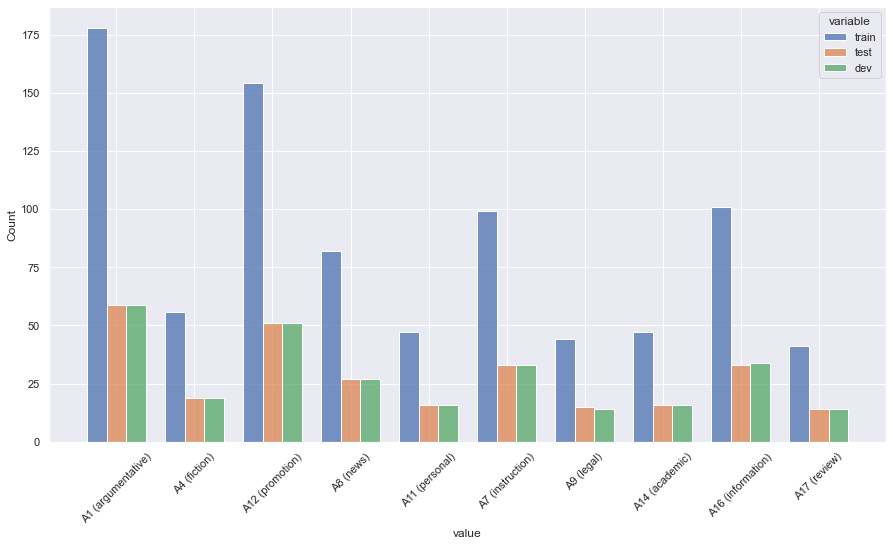

In [85]:
# Observe the distribution of labels in all splits
import matplotlib.pyplot as plt
import seaborn as sns

# make dataframe
distr_df = pd.DataFrame({"train":train.labels, "test":test.labels, "dev": dev.labels})

# plot melted dataframe in a single command
sns.set(rc = {'figure.figsize':(15,8)})

sns.histplot(distr_df.melt(), x='value', hue='variable',
             multiple='dodge', shrink=.75, bins=20)

plt.xticks(rotation=45)

In [87]:
print(distr_df.describe().to_markdown())

|        | train              | test               | dev                |
|:-------|:-------------------|:-------------------|:-------------------|
| count  | 849                | 283                | 283                |
| unique | 10                 | 10                 | 10                 |
| top    | A1 (argumentative) | A1 (argumentative) | A1 (argumentative) |
| freq   | 178                | 59                 | 59                 |


In [91]:
# Prepare the splits into a format for Simple Transformer
def Transformer_file(df, split_name):
	"""
	This function takes the split and creates a txt file that will be used for the training with Simple Transformers.

	Args:
	- df: the split in a dataframe format
	- split_name: name of the split (will be used in the name of the file)
	"""
	df = df[["texts", "labels_num"]]
	df.columns = ["text", "labels"]

	# Save the dataset
	df.to_csv(f"data\FTD-{split_name}.txt", sep="\t")


In [92]:
Transformer_file(train, "train")
Transformer_file(test,"test")
Transformer_file(dev,"dev")